This Jupyter notebook will be focused on creating graphs and various visualization for the data provided for automobile sales during recession period  
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [125]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [126]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [127]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

Text(0.5, 1.0, 'Automobile Sales during Recession')

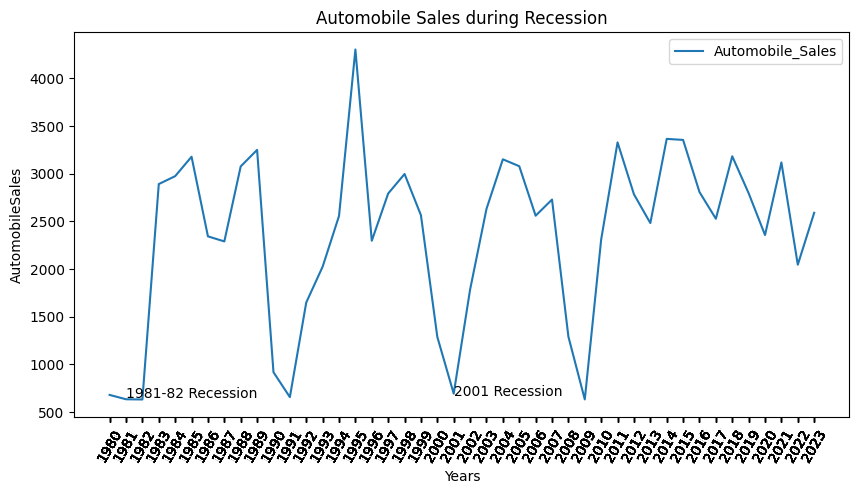

In [128]:
# QUESTION 1 Develop a line chart to show how automobile sales fluctuate from year to year
df_line = df.groupby('Year')['Automobile_Sales'].mean().reset_index()
df_line.plot(kind='line',x='Year', y='Automobile_Sales',figsize=(10,5))
plt.xlabel('Years')
plt.ylabel('AutomobileSales')
plt.xticks(df['Year'],rotation=60)
plt.text(2001,670,'2001 Recession',ha='left')
plt.text(1981,650,'1981-82 Recession',ha='left')
plt.title('Automobile Sales during Recession')


Text(0, 0.5, 'Automobile Sales')

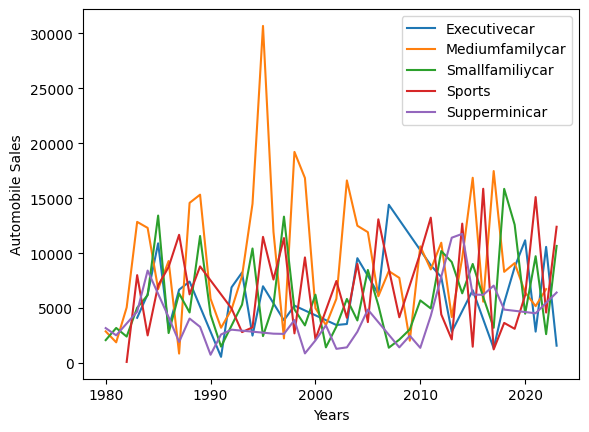

In [129]:
# QUESTION 2: Plot different lines for categories of vehicle type and analyze trend to answer question
# Is there any noticeable difference in sale trends between different vehicle types during recession period?
df_lines = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_lines.set_index('Year', inplace = True)
df_lines= df_lines.groupby(['Vehicle_Type'])['Automobile_Sales']
df_lines.plot(kind='line')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Automobile Sales')

Text(0.5, 1.0, 'Vehicle-Wise Sales during Recession and Non-Recession Period')

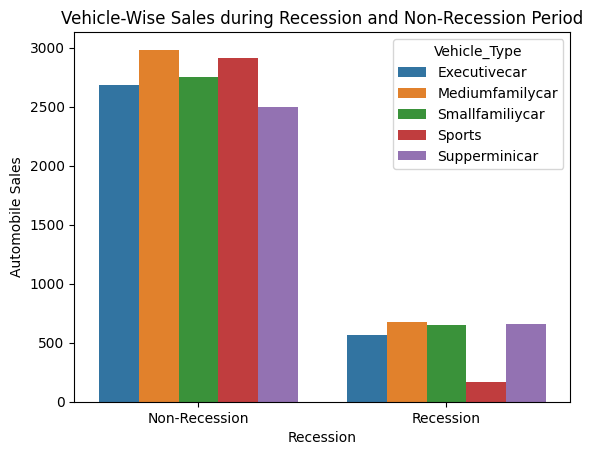

In [130]:
# QUESTION 3: Use functionality of seaborn library to create a visualization to compare the sales trend per vehicle type for recession period vs a non recession period
df_compare = df.groupby(['Recession','Vehicle_Type'],as_index=False)['Automobile_Sales'].mean()
df_compare
sns.barplot(df_compare,x= 'Recession',y='Automobile_Sales',hue='Vehicle_Type')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.ylabel('Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')


Text(0.5, 1.0, 'GDP Variation during Non-Recession Period')

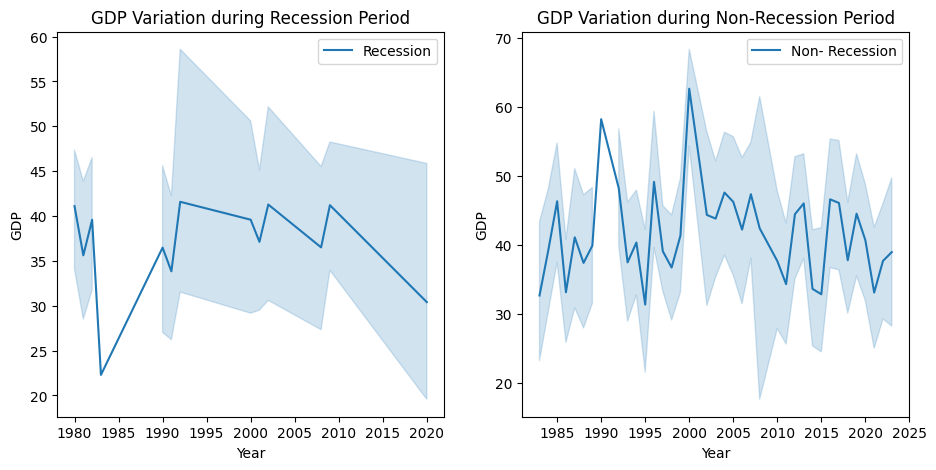

In [131]:
# QUESTION 4
# Use subplotting to compare variations in GDP during recession and non recession period by developing line plots for each period
# Create dataframes for recession and non- recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession']==0] 
# creating figure
fig = plt.figure(figsize=(11,5))
# then we create different axes for subplotting 
ax0= fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Adding subplot(1,2,1)
sns.lineplot(x='Year', y ='GDP', data= rec_data, label = 'Recession', ax= ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Adding subplot(1,2,2)
sns.lineplot(x='Year', y ='GDP', data = non_rec_data, label='Non- Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')


Text(0.5, 1.0, 'Seasonality impact on Automobile Sales')

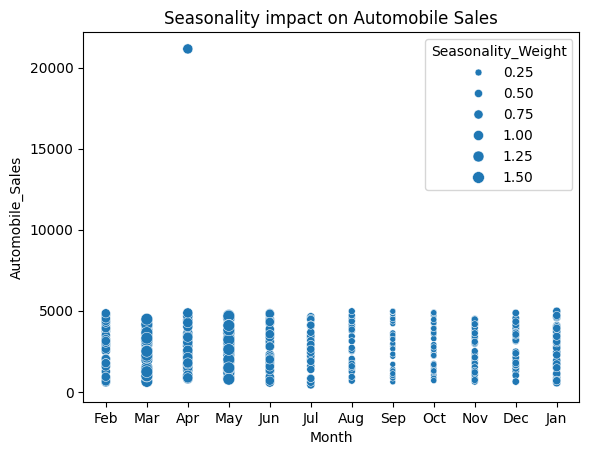

In [132]:
# QUESTION 5
# Develop a bubble plot for displaying Automobile sales for every month and use seasonality weight for representing the size of each bubble
non_rec_data = df[df['Recession'] == 0]
size=non_rec_data['Seasonality_Weight'] #for bubble effect
sns.scatterplot(data = non_rec_data, x='Month',y='Automobile_Sales', size =size)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

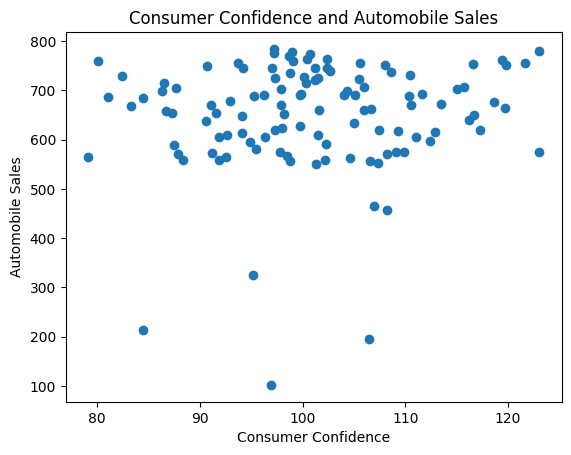

In [133]:
# QUESTION 6
# Use functionality of matplotlib to develop a scatterplot to identify correlation between average vehicle price relate to sales volume during recessions
#From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales')
plt.show()

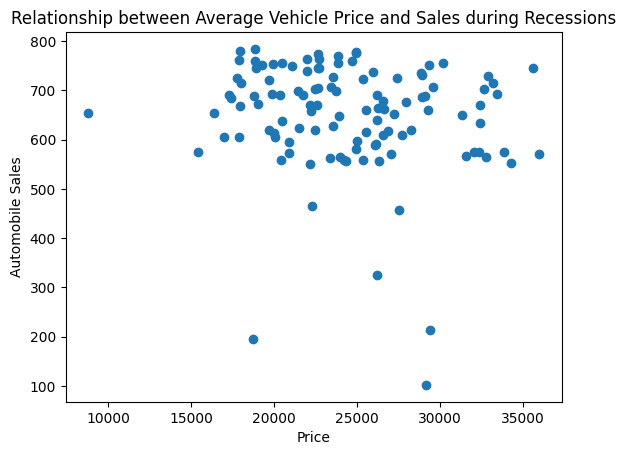

In [134]:
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

Text(0.5, 1.0, 'Advertising Expenditure during Recession and Non-Recession Periods')

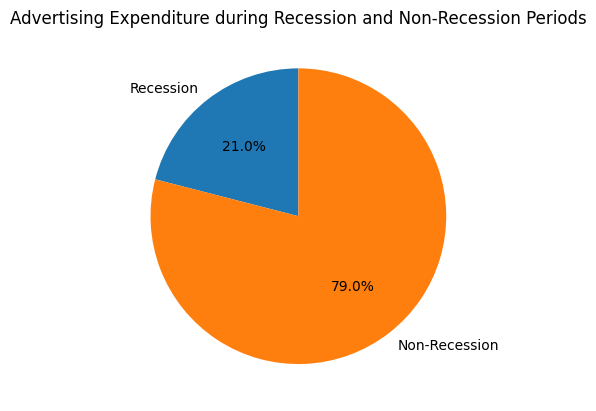

In [135]:
#QUESTION 7 Create a pie chart to display proportion of advertising expenditure of XYZ Automotives during recession and non recession periods
# How did advertising expenditure of XYZautomotives change during recession period and non recession period
rec_adv= rec_data['Advertising_Expenditure'].sum()
non_rec_adv = non_rec_data['Advertising_Expenditure'].sum()
sizes=[rec_adv,non_rec_adv]
labels = ['Recession', 'Non-Recession']
plt.pie( sizes,autopct='%1.1f%%', startangle=90,labels=labels)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')


Text(0.5, 1.0, 'Share of Each Vehicle Type in Total Expenditure during Recessions')

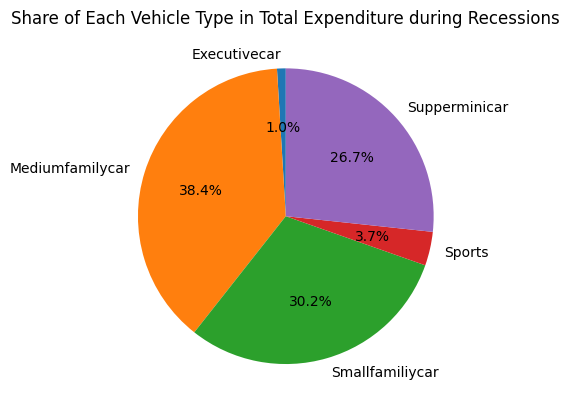

In [136]:
# Now create a pie chart to display the total advertisment expenditure for each vehicle type during recession period
VTdata = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
label = ['Executivecar','Mediumfamilycar','Smallfamiliycar','Sports','Supperminicar']
plt.pie(VTdata,autopct='%1.1f%%',startangle=90,labels=label)
plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')

C:\Users\16474\AppData\Local\Temp\ipykernel_1480\2297787641.py:3: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales',hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)


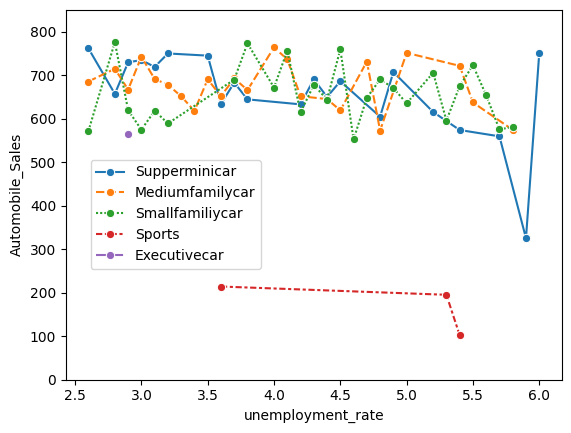

In [137]:
# QUESTION 9
# Develop a lineplot to analyse effect of unemployment rate on vehicle type and sales during Recession period
sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales',hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))